# **PROJECT 9**

### **Purpose of the project:** Optimize marketing expenses in Yandex.Afisha.<br>
### A little bit about Yandex.Afisha:

> - Yandex, one of the largest European internet companies and the leading search provider in Russia, presents a new version of its entertainment and leisure guide. Yandex.Afisha.is a platform for discovering and purchasing tickets to events (movies, concerts, etc.).<br>

> - The new Yandex.Afisha covers a wide range of events, from concerts and theatrical premieres to open-air activities.<br>

> - Events may be chosen by category, subject or relevance.<br>

> - Users may save interesting events or immediately buy tickets to a concert or movie.<br>

> - The Russian-language service currently covers events and activities in 45 cities across Russia.<br>

> - It receives event information from partner resources, directly from major event organizers, and from the websites and social network pages of smaller players. Placing event announcements in the service is free of charge.

### What we have:<br>
> * Server logs with data on Yandex.Afisha visits from June 2017 through May 2018.<br>
> * Dump file with all orders for the period.<br>
> * Marketing expenses statistics with the different sources of marketing.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
There's an introduction, which is good. It is important to write an introductory part, because it gives an idea about the content of the project.
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

Try to make it broader next time :) 
</div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Thank you for your input. You can see the updated description above.
</div>

### Step 1: Download the libraries and the data.

Note: I did the project on Visual Studio Code so I had to install sidetable and an earlier version of matplotlib than the most recent one to be enabled with this program.

In [329]:
#installing the module to be able to import the library.
%pip install sidetable


Note: you may need to restart the kernel to use updated packages.


In [330]:
%pip install matplotlib==3.7

Note: you may need to restart the kernel to use updated packages.


In [331]:
# importing all the needed libraries for the whole project.
import pandas as pd # type: ignore
import numpy as np # type: ignore
from datetime import datetime
import sidetable # type: ignore
import seaborn as sns # type: ignore
import plotly.express as px # type: ignore
import plotly.graph_objects as go # type: ignore
import matplotlib.pyplot as plt # type: ignore

##### **Orders dataframe.**

In [332]:
try:
    # attempt to read the file.
    orders = pd.read_csv('/datasets/orders_log_us.csv'),
    parse_dates = ['Buy Ts']
except FileNotFoundError:
    # handle the case where the file is not found.
    print('File not found.')
except Exception as e:
    # handle other exceptions
    print('An error occurred:', e)
else:
    # code to execute if there were no exceptions.
    print('File successfully read.')

File not found.


In [333]:
# read file and convert dates and times from column Buy Ts from object to datetime.
orders = pd.read_csv('/Users/cesarchaparro/Desktop/TripleTen/Sprint_9/Project/orders_log_us.csv', parse_dates = ['Buy Ts'])
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [334]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


##### **Costs dataframe.**

In [335]:
try:
    # attempt to read the file.
    costs = pd.read_csv('/datasets/costs_us.csv'),
    parsa_dates = ['dt']
except FileNotFoundError:
    # handle the case where the file is not found.
    print('File not found.')
except Exception as e:
    # handle other exceptions
    print('An error occurred:', e)
else:
    # code to execute if there were no exceptions.
    print('File successfully read.')

File not found.


In [336]:
# read file and convert dates and times from column dt from object to datetime.
costs = pd.read_csv('/Users/cesarchaparro/Desktop/TripleTen/Sprint_9/Project/costs_us.csv', parse_dates = ['dt'])
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    

Nice code!
</div>

In [337]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


##### **Visits dataframe.**

In [338]:
try:
    # attempt to read the file.
    visits = pd.read_csv('/datasets/visits_log_us.csv'),
    parse_dates = [['End Ts', 'Start Ts']]
except FileNotFoundError:
    # handle the case where the file is not found.
    print('File not found.')
except Exception as e:
    # handle other exceptions
    print('An error occurred:', e)
else:
    # code to execute if there were no exceptions.
    print('File successfully read.')

File not found.


In [339]:
# read file and convert dates and times from columns End Ts and Start Ts from object to datetime.
visits = pd.read_csv('/Users/cesarchaparro/Desktop/TripleTen/Sprint_9/Project/visits_log_us.csv',
                     parse_dates = ['End Ts', 'Start Ts'])
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [340]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


##### General glance of the data: From the data sets we have the correct data in order to carry on with the analysis. I can see the the time spans are detailed up to the seconds which is very good in order to see a very precise time for the visit sessions. Revenue is on USD.<br>
#### Description of the data:<br>
> **Orders dataset:**<br>
> **Uid** — unique identifier of the user making an order<br>
> **Buy Ts** — order date and time<br>
> **Revenue** — Yandex.Afisha's revenue from the order<br>

> **Costs dataset:**<br>
> **source_id** — ad source identifier<br>
> **dt** — date<br>
> **costs** — expenses on this ad source on this day<br>

> **Visits dataset** (server logs with data on website visits)**:**<br>
> **Uid** — user's unique identifier<br>
> **Device** — user's device<br>
> **Start Ts** — session start date and time<br>
> **End Ts** — session end date and time<br>
> **Source Id** — identifier of the ad source the user came from<br>
> All dates in this table are in YYYY-MM-DD format.<br>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    

Good. 
    
</div>

***

#### Step 2: Optimization of the data for better performance.<br>
>Check the information of each data frame and size to see if we need to make any changes on the type of data to optimize the size and speed of execution.

In [341]:
# getting info and memory usage for orders dataframe.
orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [342]:
# getting info and memory usage for costs dataframe.
costs.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [343]:
# getting info and memory usage for visits dataframe.
visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 32.7 MB


#### 2.1 Optimization of the data within the dataframes.

In [344]:
# checking how many categories we have in the column of Devices.
visits['Device'].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

##### I am going to make this type of data as category since I have only two diferent values along the column. In this way I will optimize the size.

In [345]:
# use category method to change the type of data on the column.
visits['Device'] = visits['Device'].astype('category')

In [346]:
# check how optimized became the dataframe of visits.
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


##### We reduced its size from 79.3MB to 57.9MB.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
You can use **parse_dates**: `parse_dates=['call_date']` when reading data. Pandas will try to automatically convert this list of columns to datetime. This is a good [article](https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e) with the examples.

</div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Thank you. I included that part of the code on the read_csv line and deleted the non-relevant lines I had on the earlier version.
</div>

In [347]:
# check how optimized the dataframe of orders became.
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


##### We succeeded to reduce its size from 4.4MB to 1.2MB.

In [348]:
# check how optimized the dataframe of costs became.
costs.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


##### We succeeded to reduce its size from 2.6KB to 59.7KB.

In [349]:
# check how optimized the dataframe of visits became.
visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


##### We succeeded to reduce its size from 79.3MB to 11.3MB now.

***

### Step 3: Pre-processing and preparing the data for analysis.

#### 3.1: Checking for missing values.

In [350]:
# checkign for missing values on the data sets.
orders.stb.missing(style = True)

,missing,total,percent
Buy Ts,0,"50,415",0.00%
Revenue,0,"50,415",0.00%
Uid,0,"50,415",0.00%


In [351]:
# checking for missing values on costs data set.
costs.stb.missing(style = True)

,missing,total,percent
source_id,0,"2,542",0.00%
dt,0,"2,542",0.00%
costs,0,"2,542",0.00%


In [352]:
# checking for missing values on visits data set.
visits.stb.missing(style = True)

,missing,total,percent
Device,0,"359,400",0.00%
End Ts,0,"359,400",0.00%
Source Id,0,"359,400",0.00%
Start Ts,0,"359,400",0.00%
Uid,0,"359,400",0.00%


##### There are no missing values on all the datasets.

#### 3.2: Cleaning the column names, they are inconsistent.

In [353]:
# clean the column names, put all in lowers and substitute spaces by underscores.
orders.columns = [col.lower().replace(' ', '_') for col in orders.columns]
visits.columns = [col.lower().replace(' ', '_') for col in visits.columns]
print(orders.columns)
print(costs.columns)
print(visits.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Index(['source_id', 'dt', 'costs'], dtype='object')
Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


#### 3.3: Checking for duplicates.

In [354]:
# checking for duplicates on column uid.
orders['uid'].value_counts()

uid
3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
8872955060259645931       1
10394363694271133241      1
17080288675258893232      1
17262220372192361159      1
17903680561304213844      1
Name: count, Length: 36523, dtype: int64

> Eventhough the output shows we have duplicates on user ids, when it should be unique values, the reason for this is that the data frame is structued with a sequence of orders, ordered by time, therefore any unique user id may perform another order on a later time and so on. So we don't need to dop any duplicates, the existance os duplicattes here is logical and we need this data.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    

Agreed. 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Do minimum and maximum values correspond to those mentioned in the task description ("Server logs with data on Yandex.Afisha visits from June 2017 through May 2018"?  
</div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Thank you. You are totally right. I missed this by the wrong asumption. I filtered the dataframes with the wrong timeframe. Now I understand some minor weird results I was getting on the earlier version.
</div>

##### Now I am going to check that the datasets have the right size on the time frame we need. From June 2017 to May 2018.

In [355]:
# retrieve statistics data to see the earliest and latest dates on the dataset.
orders['buy_ts'].describe()

count                            50415
mean     2017-12-20 05:14:24.846176768
min                2017-06-01 00:10:00
25%                2017-10-13 17:28:00
50%                2017-12-21 14:12:00
75%                2018-03-02 16:10:00
max                2018-06-01 00:02:00
Name: buy_ts, dtype: object

##### On the orders dataset we have the records from 2017-06-01 to 2018-06-01, which is one month more than what was on the instruction.

In [356]:
# retrieve statistics data to see the earliest and latest dates on the dataset.
visits['end_ts'].describe()

count                           359400
mean     2017-12-18 06:28:15.036205056
min                2017-06-01 00:02:00
25%                2017-10-15 09:45:45
50%                2017-12-18 18:59:30
75%                2018-02-28 10:08:15
max                2018-06-01 01:26:00
Name: end_ts, dtype: object

##### On the visits dataset, column end_ts we have the records from 2017-06-01 to 2018-06-01, which is one month more than what was on the instruction.

In [357]:
# retrieve statistics data to see the earliest and latest dates on the dataset.
visits['start_ts'].describe()

count                           359400
mean     2017-12-18 06:17:32.010517760
min                2017-06-01 00:01:00
25%                2017-10-15 09:41:00
50%                2017-12-18 18:46:00
75%                2018-02-28 09:54:00
max                2018-05-31 23:59:00
Name: start_ts, dtype: object

##### On the visits dataset, column end_ts we have the records from 2017-06-01 to 2018-05-01, this frame fits to the instruction.

In [358]:
# retrieve statistics data to see the earliest and latest dates on the dataset.
costs['dt'].describe()

count                             2542
mean     2017-11-29 09:04:57.403619072
min                2017-06-01 00:00:00
25%                2017-08-30 00:00:00
50%                2017-11-29 00:00:00
75%                2018-02-28 00:00:00
max                2018-05-31 00:00:00
Name: dt, dtype: object

##### On the costs dataset, column dt contains the records from 2017-06-01 to 2018-05-01, this frame fits to the instruction.

##### So what I will do is to adjust the dataframes to the correct time frame from June 2017 to May 2018 so we can do the correct calculations on the analysis.

In [359]:
# Define the start and end dates (inclusive) with time
start_date = pd.Timestamp('2017-06-01 00:00:00')
end_date = pd.Timestamp('2018-05-31 23:59:59')
# Filter the orders based on the date range
orders = orders[(orders['buy_ts'] >= start_date) & (orders['buy_ts'] <= end_date)]
orders['buy_ts'].describe()

count                            50414
mean     2017-12-20 05:09:45.867021312
min                2017-06-01 00:10:00
25%                2017-10-13 17:27:00
50%                2017-12-21 14:08:00
75%                2018-03-02 16:09:30
max                2018-05-31 23:56:00
Name: buy_ts, dtype: object

In [360]:
# Define the start and end dates (inclusive) with time
start_date = pd.Timestamp('2017-06-01 00:00:00')
end_date = pd.Timestamp('2018-05-31 23:59:59')
# Filter the orders based on the date range
visits = visits[(visits['end_ts'] >= start_date) & (visits['end_ts'] <= end_date)]
visits['end_ts'].describe()

count                           359388
mean     2017-12-18 06:20:19.773926912
min                2017-06-01 00:02:00
25%                2017-10-15 09:43:00
50%                2017-12-18 18:55:30
75%                2018-02-28 09:53:15
max                2018-05-31 23:59:00
Name: end_ts, dtype: object

##### Now we have all the datasets with the same time frame as it was instructed to do. From June 2017 to May 2018.

***

### Step 4. Analysis.

#### 4.1: Make reports and calculate metrics:<br>
> Product:<br>
> How many people use it every day, week, and month?

##### I will work with the following metrics:<br>
> DAU — the number of daily active (unique) users<br>
> WAU — the number of weekly active users<br>
> MAU — the number of monthly active users

##### The use of these metrics is to understand the user engagement with the platform.

##### I will work with the **visits** dataframe.

##### Additional parameters for cohort analysis.

In [361]:
# Creating additional date parameters that will help us in cohort analysis 
visits['week']  = pd.to_datetime(visits['start_ts']).values.astype('datetime64[W]')
visits['month'] = visits['start_ts'].values.astype('datetime64[M]')
costs['cost_month'] = costs['dt'].values.astype('datetime64[M]')

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_48053/1159486476.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_48053/1159486476.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [362]:
# Create additional parameters to work with dates columns.
visits['session_year']  = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date
# Calculate DAU metrics by grouping the users (as unique users) that started on a session date.
dau = visits.groupby(visits['session_date'])['uid'].nunique().reset_index()
dau.head()                           

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_48053/531712730.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_48053/531712730.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_48053/531712730.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_48053/531712730.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,session_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [363]:
# Calculate average dau.
avg_dau = dau['uid'].mean()
print('Average DAU:', avg_dau)

Average DAU: 907.967032967033


##### The platform has an average of 908 users who are active daily. 

In [364]:
# Plot the DAU metrics. 
fig = px.line(dau,
              x = 'session_date',
              y = 'uid',
              title = 'Daily Active Users')
#adding reference line with average DAU over time
fig.add_hline(y = dau['uid'].mean(),
              line_dash = 'dash',
              line_color = 'orange',
              annotation_text = 'average DAU',
              annotation_position = 'top left')
#customize x-axis to show all months
fig.update_xaxes(
    dtick = 'M1', #tick every month
    tickformat = '%b\n%Y' #format the ticks as abbreviated month names.
)
fig.show()

##### Interpretation:<br> 

> We can see from the plot that the engagement from June to end of the year has a positive tendency of user engagement, that means a good user acquisition strategy, After the forth month we already see a tren that goes above the average rate of engagement, reaching it peak in November 2017.<br>

> After that, I can see that there was something changed on the retention efforts of the platform as from end November until May 2018 the trend is decreasing reaching its lowest ever level in the end of March 2018.<br>

> We can see that there is a slight change of direction again from May 2018 starting to go up again.<br>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Good job! 

</div>

In [365]:
# Calculate WAU metrics by grouping the users (as unique users) that started on each week in the year.
wau = visits.groupby(visits['week'])['uid'].nunique().reset_index()
wau.head()

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


##### Weekly activity or any activity for that matter, can refer to clicks on the platform, checking prices, checking for events, registering to the platform, to contact with the platform, etc. 

In [366]:
# Calculate average wau.
avg_wau = wau['uid'].mean()
print('Average WAU:', avg_wau)

Average WAU: 5724.245283018868


##### The plarform has an average of 5724 users being active during a week.

In [367]:
# Plot the WAU metrics. 
fig = px.line(wau,
              x = 'week',
              y = 'uid',
              title = 'Weekly Active Users')
#adding reference line with average WAU over time
fig.add_hline(y = wau['uid'].mean(),
              line_dash = 'dash',
              line_color = 'red',
              annotation_text = 'average WAU',
             annotation_position = 'top left')
#customize x-axis to show all months
fig.update_xaxes(
    dtick = 'M1', #tick every month
    tickformat = '%b\n%Y' #format the ticks as abbreviated month names.
)
fig.show()

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



##### Interpretation: From the plot we can see a similar correlation with the plot of the daily active users, but there is a new data here where I can see that from end April 2018 we see a decreasing graph and reaching the lowest week level in the end of May 2018.<br>
##### This difference may indicate a surge on new users that signed in during that time.

In [368]:
# Calculate MAU metrics by grouping the users (as unique users) that started on each monthe in a year.
mau = visits.groupby(visits['month'])['uid'].nunique().reset_index()
mau

,month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


In [369]:
# Calculate average mau.
avg_mau = mau['uid'].mean()
print('Average MAU:', avg_mau)

Average MAU: 23227.833333333332


##### The platform has an average of 23228 users being active in a month.

In [370]:
# Calculate the dau/mau ratio.
dau_mau = (avg_dau / avg_mau) * 100
print('DAU/MAU:', f"{dau_mau:.2f}%")

DAU/MAU: 3.91%


#### Interpretation:<br>

> The ratio of around 4% DAU/MAU indicates that is a low percentage but having in mind the type of industry Yandex belongs to, we can conclude few points:<br>
> 1. The activity of the users may be influenced by the offer of events that there are throught the months.<br>

> 2. It can happen that users are active on the platform but don't decide to purchase a ticket for an event at that moment. Yandex.Afisha caters to a more event-driven user base. People typically don't browse for events daily; they might actively search when planning to attend something specific. This naturally leads to lower daily activity compared to monthly active users who might check the platform occasionally.<br>

> 3. The decision to attend an event often involves a consideration cycle. Users might browse the platform days or weeks before purchasing tickets. This can contribute to a lower DAU/MAU ratio as active users (browsing) might not translate directly to daily active buyers.<br>

> For Yandex.Afisha, a DAU/MAU of 4% might be reasonable considering the event-driven nature of the platform.

In [371]:
# Plot the MAU metrics. 
fig = px.line(mau,
              x = 'month',
              y = 'uid',
              title = 'Monthly Active Users')
#adding reference line with average DAU over time
fig.add_hline(y = mau['uid'].mean(),
              line_dash = 'dash',
              line_color = 'purple',
              annotation_text = 'average MAU',
             annotation_position = 'top left')
#customize x-axis to show all months
fig.update_xaxes(
    dtick = 'M1', #tick every month
    tickformat = '%b\n%Y' #format the ticks as abbreviated month names.
)
fig.show()

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



##### If we compare the monthly activity with the dailty and weekly activity we can see more abrupt changes on the behavior of users through the months.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Correct. 
</div>

#### 4.2: Make reports and calculate metrics:<br>
> Product:<br>
> How many sessions are there per day? (One user might have more than one session.)

In [372]:
# Calculating number of sessions/day per user and add it on a column. 
dau_new = visits.groupby(visits['session_date']).agg(
    {'uid': ['count', 'nunique']}
    ).reset_index()
dau_new.columns = ['session_date',
                   'n_sessions',
                   'n_users']
dau_new['sessions_per_user'] = (
    dau_new['n_sessions'] / dau_new['n_users'])
dau_new.head()

,session_date,n_sessions,n_users,sessions_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024


In [373]:
# Calculate average sessions per user.
avg_ssns_per_user = dau_new['sessions_per_user'].mean()
print('Average Sessions per User:', avg_ssns_per_user)

Average Sessions per User: 1.0821671112951867


##### The platform has an average of 1.08 sessions per user.

In [374]:
# Plotting sessions per user.
fig = px.line(dau_new,
              x = 'session_date',
              y = 'sessions_per_user',
              title = 'Sessions per user')
#adding reference line with average sessions per user
fig.add_hline(y = dau_new['sessions_per_user'].mean(),
              line_dash = 'dash',
              line_color = 'purple')
fig.add_annotation(x = '2017-09', y = 1.09,
            text = 'Average Sessions per User',
            showarrow = True,
            arrowhead = 1)
#customize x-axis to show all months
fig.update_xaxes(
    dtick = 'M1', #tick every month
    tickformat = '%b\n%Y') #format the ticks as abbreviated month names.
fig.show()

##### From the above plot we can see that an average user use the platform bit more than one time a day. This plot shows a steady activity in general except a peak in the end of November and a deep drop in April.

In [375]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dau_new['session_date'], 
                        y = dau_new['n_sessions'],
                    mode = 'lines',
                    name = 'DAU', line = dict(color = 'orange', width = 2 )))
fig.add_trace(go.Scatter(x = dau_new['session_date'], 
                        y = dau_new['n_users'], 
                    mode = 'lines',
                    name = 'Sessions_per_user', line = dict(color = 'blue', width = 2 )))
#customize x-axis to show all months.
fig.update_xaxes(
    dtick = 'M1', #tick every month.
    tickformat = '%b\n%Y', #format the ticks as abbreviated month names.
    title_text='Session Date'
)
# Customize y-axis label
fig.update_yaxes(title_text='uid')  # Add y-axis label
# Add title to the plot
fig.update_layout(title_text = 'Comparison of DAU and Sessions per User')
fig.update_layout(
    showlegend = True)
fig.show()

> From the above plot and also the one for sessions per user, we can observe that there is not really a difference on the behavior of daily activiy per user and the number of sessions per user.<br>

> This suggests that users who are active on a particular day tend to be more engaged and use the platform multiple times.<br>

> Most active users only have around single session per day, then the DAU and sessions per user graphs will be very similar. This might indicate a need to encourage users to engage in more frequent or longer sessions..<br>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Good job! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
- Let's estimate and print the average number of sessions per user.
    

- Please make sure each chart has a title and axes labels. </div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Got it. I included that part now, also included title and axes labels.
</div>

#### 4.3: Make reports and calculate metrics:<br>
> Product:<br>
> What is the length of each session?

In [376]:
# Calculate the session length by subtracting the session end from the session start Ts.
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head()

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_48053/123647951.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,device,end_ts,source_id,start_ts,uid,week,month,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-21,2017-12-01,2017,12,52,2017-12-27,0


In [377]:
# Calculate average session length in minutes.
print(f'Session Length: {visits["session_duration_sec"].mean() / 60:.2f} minutes')


Session Length: 10.72 minutes


#### Each session has an average duration of 11 minutes.

> That information about the average session length being 11 minutes adds another piece to the puzzle of interpreting the similar plots for DAU and sessions per user.<br>

> If the average session length is 11 minutes and the plots for DAU and sessions per user are similar, it strengthens the idea of proportionality.<br>

> An average session length of 11 minutes, combined with similar DAU and sessions per user plots, could indicate shallow or focused user engagement.<br>

> Consider the functionalities offered by the platform. If it's designed for quick tasks like booking tickets (like Yandex.Afisha), a 11-minute average session length might be reasonable.
However, if it's designed for deeper engagement (e.g., social media), it might indicate a need for improvement.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

I think we should also display the distribution, since the average may not tell us much. 

</div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Thank you. I included that now, now I have a broader concept and understanding.
</div>

In [378]:
print(visits['session_duration_sec'].describe())

count    359388.000000
mean        643.465703
std        1016.280993
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64


##### Analysis:

> Number of Users: There are a substantial number of users in the data set (around 359,388).

> Average Session Length: The average session length is approximately 643 seconds (around 10.7 minutes).

> Spread of the Data: The standard deviation (1016 seconds) is higher than the mean, indicating a wider spread of session lengths around the average.

> Distribution Skew: The minimum value (0 seconds) suggests there might be a small portion of users with no recorded session activity. The maximum value (84,480 seconds - over 23 hours) is likely an outlier and significantly higher than the rest of the data.

>25th Percentile (Q1): 120 seconds (2 minutes) - This indicates that 25% of users have average session lengths below 2 minutes.

> 50th Percentile (Median): 300 seconds (5 minutes) - Half of the users have average sessions shorter than 5 minutes, and the other half have sessions longer than 5 minutes.

>75th Percentile (Q3): 840 seconds (14 minutes) - 75% of users have average session lengths below 14 minutes.

***

#### 4.4: Make reports and calculate metrics:<br>
##### **Retention:** It refers to a company's ability to keep its customers engaged and coming back for repeat business.<br>

> Product:<br>
> What's the user Retention Rate?

##### First calculate the first session date in order to create Cohorts.

In [379]:
# Calculate first session for each user.
first_visit = visits.groupby(['uid'])['session_date'].min().reset_index()
first_visit.columns = ['uid', 'first_session']
first_visit.head()

,uid,first_session
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [380]:
# Now marging to the original data set.
visits = visits.merge(first_visit, how = 'inner', on = ['uid'])
visits.head()

,device,end_ts,source_id,start_ts,uid,week,month,session_year,session_month,session_week,session_date,session_duration_sec,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017,12,51,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018,2,8,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017,7,26,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018,5,20,2018-05-20,1440,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-08,2018-03-01,2018,3,10,2018-03-09,1680,2018-03-09


In [381]:
# Define cohort parameter.
visits['cohort_visits'] = visits['first_session'].values.astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,week,month,session_year,session_month,session_week,session_date,session_duration_sec,first_session,cohort_visits
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017,12,51,2017-12-20,1080,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018,2,8,2018-02-19,1680,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017,7,26,2017-07-01,0,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018,5,20,2018-05-20,1440,2018-03-09,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-08,2018-03-01,2018,3,10,2018-03-09,1680,2018-03-09,2018-03-01


In [382]:
# Define lifetime parameter and calculate the difference in months.
visits['session_lag'] = ((pd.to_datetime(visits['session_date']) - pd.to_datetime(visits['first_session'])) / np.timedelta64(1,'D') / 30)\
                                                                        .round().astype('int')
visits.head()

,device,end_ts,source_id,start_ts,uid,week,month,session_year,session_month,session_week,session_date,session_duration_sec,first_session,cohort_visits,session_lag
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017,12,51,2017-12-20,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018,2,8,2018-02-19,1680,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017,7,26,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018,5,20,2018-05-20,1440,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-08,2018-03-01,2018,3,10,2018-03-09,1680,2018-03-09,2018-03-01,0


##### The new column session_lag represents the months that passed between the first session date and the subsequent session date when the user returned. In this case the 0 value means that the user did several sessions on the first session date.

In [383]:
# Create a pivot table.
cohorts = visits.pivot_table(index = 'cohort_visits',
                             columns = 'session_lag',
                             values = 'uid',
                             aggfunc = 'nunique').fillna(0)
cohorts

session_lag,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_visits,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,0.0
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,0.0,0.0
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,0.0,0.0,0.0
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,0.0,0.0,0.0,0.0
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### On the above cohort pivot table the values represent the users that belong to each cohort for the different session lags.

In [384]:
# Create Retention, as %, on the pivot table.
retention = cohorts.iloc[:,0:].div(cohorts[0], axis = 0)
retention

session_lag,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_visits,,,,,,,,,,,,,
2017-06-01,1.0,0.072027,0.054303,0.058451,0.071197,0.063881,0.065993,0.053775,0.056264,0.049702,0.043442,0.038691,0.020514
2017-07-01,1.0,0.054490,0.052359,0.051370,0.058371,0.046347,0.046119,0.047108,0.040107,0.028843,0.025647,0.008600,0.000000
2017-08-01,1.0,0.067872,0.062273,0.056674,0.053728,0.040468,0.043021,0.033396,0.029368,0.023868,0.005697,0.000000,0.000000
2017-09-01,1.0,0.074174,0.066870,0.048851,0.040888,0.038434,0.034183,0.025144,0.021911,0.003652,0.000000,0.000000,0.000000
2017-10-01,1.0,0.071525,0.053278,0.036956,0.037533,0.030296,0.021750,0.018401,0.004619,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.0,0.067858,0.046609,0.037287,0.033030,0.023451,0.019084,0.003927,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.0,0.049747,0.041832,0.028455,0.022835,0.015830,0.003997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.0,0.052643,0.036687,0.024620,0.018609,0.002077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.0,0.046808,0.027121,0.018336,0.003018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Correct. 
    
</div>

##### On the above cohort table the values represent the percentage of users that belong to each cohort for different session lags.

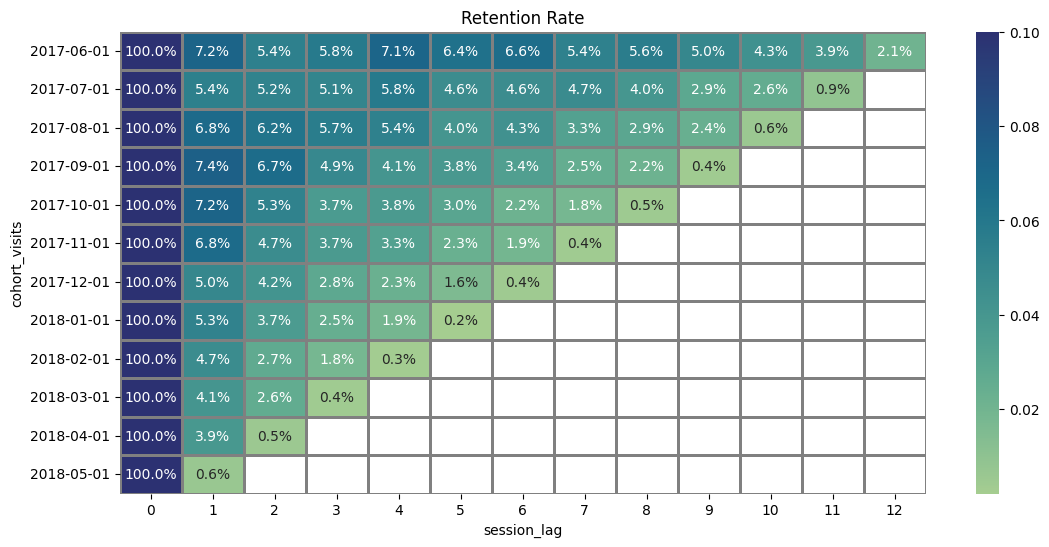

In [385]:
# To format cohort into a str.
retention.index = retention.index.astype(str)
# Plotting the heatmap
plt.figure(figsize = (13, 6))
sns.heatmap(retention.mask(retention == 0.0),
            annot = True,
            fmt = '.1%',
            cmap = 'crest',
            linewidths = 1,
            linecolor = 'grey',
            vmax = 0.1,
            cbar_kws = {'orientation': 'vertical'}).set(title = 'Retention Rate')
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Looks great!     
</div>

##### Description:<br>
> X-axis: This represents the session lag (from first ever session to the subsequent session), which is the month that passed since a user's first visit.<br>
> Y-axis: This represents the cohort_visits, which is the number of times users in the cohort visited the platform within a specific timeframe.<br>

> Color Gradient: The color gradient represents the retention rate (percentage of users retained). Darker colors represent higher values (better retention), while lighter colors represent lower values.<br>

##### Interpretation:<br>

> This heatmap suggests that users with more visits early on (higher cohort_visits) tend to have a higher customer lifetime value (darker color in the upper right corner). This indicates that users who engage more frequently early on are more likely to be valuable customers in the long run.<br>

> Users who visit the platform 3 times in their first week (cohort_visit = 3) and are retained for 9 months might have a high retention rate (darker color in that area).<br>

> Conversely, users who visit only once in their first week (cohort_visit = 1) and churn (stop using the platform) after 2 months might have a low retention rate (lighter color in that area).

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Correct.     
</div>

***

#### 4.5: Make reports and calculate metrics:<br>
##### **Conversion:** refers to the process of transforming a visitor or potential customer into a paying customer.<br>

> Sales:<br>
> When do people start buying? In KPI analysis, the time that elapses between registration and conversion — when the user becomes a customer. To determine which cohort, or marketing channel, is most effective.

##### I will work with the **orders** dataframe.

In [386]:
# Calculate first order by grouping per user.
orders['purchase_date'] = orders['buy_ts'].dt.date
first_order = orders.groupby(['uid'])['purchase_date'].min().reset_index()
first_order.columns = ['uid', 'first_order']
first_order.head()

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_48053/4113537793.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,uid,first_order
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


##### The column first_order_month reprerents the date when the user placed the first order.

In [387]:
# Join with orders dataframe.
conversion = first_visit.merge(first_order, how = 'inner', on = ['uid'])
conversion.head()

,uid,first_session,first_order
0,313578113262317,2017-09-18,2018-01-03
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-27,2018-01-28
4,2551852515556206,2017-11-24,2017-11-24


In [388]:
# Calculate conversion time in days.
conversion['conversion'] = ((pd.to_datetime(conversion['first_order']) - pd.to_datetime(conversion['first_session']))
                               / np.timedelta64(1,'D')).round().astype('int')
conversion.head()

,uid,first_session,first_order,conversion
0,313578113262317,2017-09-18,2018-01-03,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-27,2018-01-28,1
4,2551852515556206,2017-11-24,2017-11-24,0


##### The above conversion column represents the number of days from the first session date to the first order date.

In [389]:
# Plot the average conversion rate.
fig = px.histogram(conversion,
                   x = 'conversion',
                   title = 'Average Conversion Rate',
                   nbins = 30)
# Update the y-axis label
fig.update_yaxes(title_text='users')
fig.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Looks correct.     
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Axes labels such as `Frequency` or `Count` may seem unclear to a reader. 
    
</div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Thank you. I fixed the Count label.
</div>

##### We can see that the highest conversion there is occurs on the same day when users visit the platform. Then it drops dramatically and keeps on a low level.

In [390]:
# Calcualate the average conversion rate
conversion['conversion'].median()

0.0

##### It takes 0 days to convert a user, that means that a user place the first order on the same day when the user first visits the site. More observations detailed on the earlier histogram description.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Yes, the chart also implies that. </div>

#### Histogram interpretation:

> From the histogram we can observe that most users placed their first order on the same day when they first had a visit. Users likely convert on their first session because they have a specific event in mind that they want to attend. This targeted purchase intent leads to a high conversion rate. Also if we consider the average session length of 11 minutes it a is reasonable time for a session.<br>

> A large number of users converting on their first session suggests a well-designed onboarding experience that effectively guides users towards making a purchase, and it is logical on the context of Yandex.Afisha.<br>

> Since users are likely attending a specific event, they might not need to purchase tickets again in the immediate future. This leads to a significant drop in purchases after the initial session.<br>

> Ticket purchases might fluctuate depending on the event season. There could be times with high demand (e.g., concert season) followed by periods with lower activity.


***

In [391]:
# To calculate the relative frequencies of the unique values in the conversion column of the purchase DataFrame in percentages.
conversion['conversion'].value_counts(normalize = True) * 100

conversion
0      68.558677
1       5.380319
2       1.875582
3       1.237610
4       1.056897
         ...    
329     0.002738
285     0.002738
288     0.002738
335     0.002738
358     0.002738
Name: proportion, Length: 349, dtype: float64

##### 68.5% of users converted on the same day when they first had a session. And then dramatically drops the % over the next months. We can see it visualized on an histogram.<br>
##### Then it drops to 5.3% of users who converted on the next day. And so on.

In [392]:
# To calculate how many conversions were at all.
print(' The overall conversion is {:.1%}'.format(orders['uid'].nunique() / visits['uid'].nunique()))

 The overall conversion is 16.0%


##### This ratio of 16% represents the proportion of visitors who converted into paying customers.<br>
##### It's important to compare the 16% rate to historical data for Yandex.Afisha and industry benchmarks for event ticketing platforms. This will give a better understanding of how your conversion rate performs and identify areas for improvement specific to the business goals.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Excellent! </div>

#### 4.5: Make reports and calculate metrics:<br>
> Sales:<br>
> How many orders do they make during a given period of time?

In [393]:
# Capture the months from the first order date.
conversion['first_order'] = conversion['first_order'].values.astype('datetime64[M]')
conversion.head()

,uid,first_session,first_order,conversion
0,313578113262317,2017-09-18,2018-01-01,107
1,1575281904278712,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27,2018-01-01,1
4,2551852515556206,2017-11-24,2017-11-01,0


##### We define the cohort for orders as the first_order (month).

In [394]:
# Calculate the number of new customers for each month.
cohort_sizes = conversion.groupby('first_order').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order', 'cohort_size']
cohort_sizes

,first_order,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


##### Analysis:<br>
> 2023 users made their first order in june, they therefore fall under the cohort of June, regardless of the time when they registered to the platform.<br>
> 1923 users made their first order in july, and so on.

##### On the next step I want to analyze the total order volume generated by each cohort over time. This helps track revenue generation trends across different cohorts.

In [395]:
# Merge orders with conversion subset to get the revenue, first_order(M), and the orders dates.
cohort = orders.merge(conversion, how = 'inner', on = 'uid')
cohort.head()

,buy_ts,revenue,uid,purchase_date,first_session,first_order,conversion
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0


In [396]:
# Capture the months from the purchase date.
cohort['purchase_date'] = cohort['purchase_date'].values.astype('datetime64[M]')
# Group the data frame on first orders and purchase date and do the calculation for the revenue for the group.
cohort = cohort.groupby(['first_order', 'purchase_date'])['revenue'].count().reset_index()
cohort.head()

,first_order,purchase_date,revenue
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [397]:
# Merge cohort and cohort sizes subset.
cohort = cohort.merge(cohort_sizes, how = 'inner', on = 'first_order')
cohort.head()

,first_order,purchase_date,revenue,cohort_size
0,2017-06-01,2017-06-01,2354,2023
1,2017-06-01,2017-07-01,177,2023
2,2017-06-01,2017-08-01,174,2023
3,2017-06-01,2017-09-01,226,2023
4,2017-06-01,2017-10-01,292,2023


In [398]:
# Add age column.
cohort['age_month'] = ((cohort['purchase_date'] - cohort['first_order']) / np.timedelta64(1,'D') / 30).round()
cohort.head()

,first_order,purchase_date,revenue,cohort_size,age_month
0,2017-06-01,2017-06-01,2354,2023,0.0
1,2017-06-01,2017-07-01,177,2023,1.0
2,2017-06-01,2017-08-01,174,2023,2.0
3,2017-06-01,2017-09-01,226,2023,3.0
4,2017-06-01,2017-10-01,292,2023,4.0


##### The column age tells you how many months have passed since a user from a specific cohort made a purchase. This column provides valuable insights into user behavior by allowing to analyze purchases based on how long users have been part of a particular cohort.

In [399]:
# Add orders per buyer and its calculation.
cohort['orders_per_buyer'] = cohort['revenue'] / cohort['cohort_size']
cohort.head()

,first_order,purchase_date,revenue,cohort_size,age_month,orders_per_buyer
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340


In [400]:
# Create a pivot table.
cohort_piv=cohort.pivot_table(
    index = 'first_order', 
    columns = 'age_month', 
    values = 'orders_per_buyer', 
    aggfunc = 'sum'
)
cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order,,,,,,,,,,,,
2017-06-01,1.16,0.09,0.09,0.11,0.14,0.11,0.14,0.09,0.1,0.08,0.05,0.04
2017-07-01,1.14,0.05,0.06,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.03,
2017-08-01,1.12,0.08,0.07,0.06,0.06,0.05,0.04,0.06,0.03,0.03,,
2017-09-01,1.14,0.08,0.06,0.06,0.03,0.04,0.04,0.02,0.02,,,
2017-10-01,1.14,0.07,0.04,0.03,0.03,0.02,0.02,0.03,,,,
2017-11-01,1.18,0.1,0.04,0.05,0.03,0.01,0.02,,,,,
2017-12-01,1.15,0.06,0.05,0.04,0.02,0.02,,,,,,
2018-01-01,1.12,0.07,0.05,0.02,0.02,,,,,,,
2018-02-01,1.12,0.06,0.02,0.02,,,,,,,,


In [401]:
# Create a cumulative pivot table.
cohort_piv=cohort.pivot_table(
    index = 'first_order', 
    columns = 'age_month', 
    values = 'orders_per_buyer', 
    aggfunc = 'sum'
).cumsum(axis = 1)
cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


##### The above pivot table calculates and presents the cumulative number of orders placed by users in each cohort, grouped by their age within the cohort (in months). 

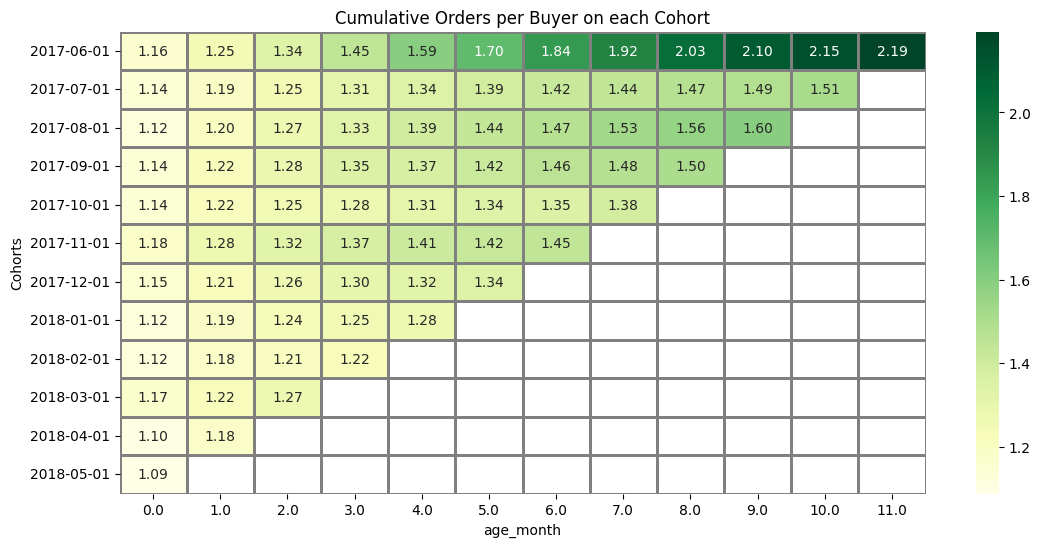

In [402]:
# To format cohort into a str.
cohort_piv.index = cohort_piv.index.astype(str)
# Plotting the heatmap
plt.figure(figsize = (13, 6))
sns.heatmap(cohort_piv,
            annot = True,
            fmt = '.2f',
            cmap = 'YlGn',
            linewidths = 1,
            linecolor = 'grey',
            cbar_kws = {'orientation': 'vertical'}).set(title = 'Cumulative Orders per Buyer on each Cohort')
plt.ylabel("Cohorts")
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Everything is correct here as well! </div>

##### Description:<br>
> The color intensity in each cell likely represents the average order volume for users in a specific cohort at a particular age within that cohort. Darker colors indicate higher average order volume, while lighter colors indicate lower average order volume.<br>

***

#### 4.6: Make reports and calculate metrics:<br>
> Sales:<br>
> What is the average purchase size?

##### Average purchase size is a metric that measures the average amount of revenue generated from a single order within a specific timeframe.

In [403]:
# calculating total check for each order and plotting it
avg_check = cohort.groupby(['orders_per_buyer'])['revenue'].sum().reset_index()
avg_check.head()

,orders_per_buyer,revenue
0,0.012480,24
1,0.014457,59
2,0.018974,64
3,0.019173,70
4,0.019621,86


In [404]:
# Plot the average check.
fig = px.histogram(avg_check,
                   x = 'revenue',
                   title = 'Average Check',
                   color_discrete_sequence = ['orange'])
fig.show()

##### I can see there is a similar trend of conversion rate and the average check.

##### To do the cohort analysis on average check I will use the earlier cohort subset which already have the data I need.

In [405]:
# Pivot table of average check on cohort.
cohort_piv = cohort.pivot_table(
    index = 'first_order', 
    columns = 'age_month', 
    values = 'revenue', 
    aggfunc = 'mean'
)
cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01-01,3783.0,224.0,159.0,64.0,78.0,,,,,,,
2018-02-01,4095.0,222.0,83.0,70.0,,,,,,,,


In [406]:
# Pivot table of cumulative average check on cohort.
cohort_piv = cohort.pivot_table(
    index = 'first_order', 
    columns = 'age_month', 
    values = 'revenue', 
    aggfunc = 'mean'
).cumsum(axis = 1)
cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order,,,,,,,,,,,,
2017-06-01,2354.0,2531.0,2705.0,2931.0,3223.0,3441.0,3717.0,3891.0,4103.0,4256.0,4352.0,4438.0
2017-07-01,2186.0,2286.0,2406.0,2510.0,2582.0,2664.0,2725.0,2775.0,2833.0,2857.0,2910.0,
2017-08-01,1533.0,1641.0,1741.0,1822.0,1907.0,1969.0,2018.0,2096.0,2142.0,2188.0,,
2017-09-01,2933.0,3152.0,3313.0,3477.0,3544.0,3653.0,3761.0,3817.0,3878.0,,,
2017-10-01,4964.0,5278.0,5440.0,5562.0,5691.0,5794.0,5880.0,6005.0,,,,
2017-11-01,4813.0,5210.0,5392.0,5603.0,5739.0,5798.0,5900.0,,,,,
2017-12-01,5052.0,5322.0,5524.0,5703.0,5789.0,5894.0,,,,,,
2018-01-01,3783.0,4007.0,4166.0,4230.0,4308.0,,,,,,,
2018-02-01,4095.0,4317.0,4400.0,4470.0,,,,,,,,


##### Calculating the average revenue by age group for each cohort allows us to understand user behavior and purchase patterns within a cohort system.

##### Cumulative Pivot Table: This takes the above pivot table and calculates the running total of average revenue for each age group within a cohort. It reveals how the average revenue accumulates as users age within the cohort.

In [407]:
# Calculate overall average purchase size.
descriptive_stat = cohort['revenue'].describe()
print('Overall Average Purchase Size:', descriptive_stat['mean'])

Overall Average Purchase Size: 646.3333333333334


##### The overall purchase size is $646.33.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Very good!     

We can also estimate the average purchase size for the whole data as well (we will need to use the `orders` dataframe for this purpose).


It may also be beneficial if we display how the average size changes from month to month. 

</div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Thank you. This is updated now with this version.
</div>

In [408]:
# Calculate average purchase size from all the data.
avg_all_orders = orders['revenue'].mean()
print(f'Average Purchase Size for All Orders: {avg_all_orders:.2} USD')

Average Purchase Size for All Orders: 5.0 USD


##### The average purchase size for all the data is $5.0

##### Key Observations:

> There appears to be a significant discrepancy between the average purchase amount within a cohort (648 USD) and the average purchase calculated across all users (5.0 USD).

> The chosen cohort might represent users with a higher propensity to spend compared to the overall user base. This could be due to factors like:<br>

>>    1. Targeting specific demographics or user segments known for higher purchase values.
>>    2. Focusing on users who have recently made a purchase, potentially indicating a period of increased spending.

In [409]:
# Calculate average check over time.
avg_check_over_time = cohort.groupby(['age_month', 'orders_per_buyer'])['revenue'].mean().reset_index()
avg_check_over_time.head()

,age_month,orders_per_buyer,revenue
0,0.0,1.087349,3249.0
1,0.0,1.096221,2495.0
2,0.0,1.118978,1533.0
3,0.0,1.121554,3783.0
4,0.0,1.121611,4095.0


In [410]:
# Plotting average check over time.
fig = px.line(avg_check_over_time,
              x = 'age_month',
              y = 'revenue',
              title = 'Average Check Over Time')
fig.show()

##### Summary of metrics used on my analysis:

> 1. DAU, WAU and MAU and their average.<br>

> 2. DAU, WAU and MAU ratio.<br>

> 3. Number of sessions / day per user.<br>

> 4. Sesssion length and its average.<br>

> 5. Retention.<br>

> 6. Cohorts - Visits.<br>

> 7. Conversion.<br>

> 8. Average conversion rate.<br>

> 9. Overall conversion.<br>

> 10. Cohorts - Orders.<br>

> 11. Age.<br>

> 12. Orders per buyer.<br>

> 13. Average check.<br>

> 14. Overall average purchase size.

***

#### 4.6: Make reports and calculate metrics:<br>
> Sales:<br>
> How much money do they bring? (LTV)

##### Lifetime Value (LTV), is a metric that estimates the revenue a customer generates over their entire relationship with a business. It takes into account not just a single purchase, but the entire history of a customer's interactions with the business,

##### Some of the metrics I already have from earlier steps.

In [411]:
# Capture the months from the dates in the tables of orders.
orders['orders_month'] = orders['purchase_date'].values.astype('datetime64[M]')

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_48053/3772849118.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [412]:
# Group the data frame on first orders and purchase date and do the calculation for the revenue for the group.
cohort_ltv = cohort.groupby(['cohort_size'])['revenue'].sum().reset_index()
cohort_ltv.columns = ['cohort_size', 'revenue_ltv']
cohort_ltv

,cohort_size,revenue_ltv
0,1370,2188
1,1923,2910
2,2023,4438
3,2276,2690
4,2581,3878
5,2988,3249
6,3373,4308
7,3533,4484
8,3651,4470
9,4081,5900


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    

Shouldn't we group data by first_order and take the number of unique users? 
    
    
</div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Got it. I did that earlier on the code, when I worked on cohort sizes. I took the data from there instead of repeating it again.
</div>

##### The column of revenue specifies the revenue the cohort brought.

##### LTV is a cohort's cumulative revenue, accounting for the number of people in the cohort.

In [413]:
# Merge cohort and cohort_ltv.
cohort = cohort.merge(cohort_ltv, how = 'inner', on = 'cohort_size')
cohort.head()

,first_order,purchase_date,revenue,cohort_size,age_month,orders_per_buyer,revenue_ltv
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618,4438
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494,4438
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011,4438
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715,4438
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340,4438


In [414]:
# Make the columns show the cohort's age.
cohort['age'] = ((cohort['purchase_date'] - cohort['first_order'])
                 / np.timedelta64(1, 'D') / 30).round().astype('int')
cohort.head()

,first_order,purchase_date,revenue,cohort_size,age_month,orders_per_buyer,revenue_ltv,age
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618,4438,0
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494,4438,1
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011,4438,2
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715,4438,3
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340,4438,4


In [415]:
# Make the ltv column and its calculation.
cohort['ltv'] = cohort['revenue_ltv'] / cohort['cohort_size']
cohort.head()

,first_order,purchase_date,revenue,cohort_size,age_month,orders_per_buyer,revenue_ltv,age,ltv
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618,4438,0,2.193772
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494,4438,1,2.193772
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011,4438,2,2.193772
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715,4438,3,2.193772
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340,4438,4,2.193772


In [416]:
# Pivot table.
cohort_piv = cohort.pivot_table(
    index = 'first_order', 
    columns = 'age', 
    values = 'ltv', 
    aggfunc = 'sum'
)
cohort_piv.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06-01,2.19,2.19,2.19,2.19,2.19,2.19,2.19,2.19,2.19,2.19,2.19,2.19
2017-07-01,1.51,1.51,1.51,1.51,1.51,1.51,1.51,1.51,1.51,1.51,1.51,
2017-08-01,1.60,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,,
2017-09-01,1.50,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,,,
2017-10-01,1.38,1.38,1.38,1.38,1.38,1.38,1.38,1.38,,,,
2017-11-01,1.45,1.45,1.45,1.45,1.45,1.45,1.45,,,,,
2017-12-01,1.34,1.34,1.34,1.34,1.34,1.34,,,,,,
2018-01-01,1.28,1.28,1.28,1.28,1.28,,,,,,,
2018-02-01,1.22,1.22,1.22,1.22,,,,,,,,


In [417]:
# Cumulative Pivot table.
cohort_piv = cohort.pivot_table(
    index = 'first_order', 
    columns = 'age', 
    values = 'ltv', 
    aggfunc = 'sum'
).cumsum(axis = 1)
cohort_piv.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06-01,2.19,4.39,6.58,8.78,10.97,13.16,15.36,17.55,19.74,21.94,24.13,26.33
2017-07-01,1.51,3.03,4.54,6.05,7.57,9.08,10.59,12.11,13.62,15.13,16.65,
2017-08-01,1.60,3.19,4.79,6.39,7.99,9.58,11.18,12.78,14.37,15.97,,
2017-09-01,1.50,3.01,4.51,6.01,7.51,9.02,10.52,12.02,13.52,,,
2017-10-01,1.38,2.77,4.15,5.53,6.92,8.3,9.69,11.07,,,,
2017-11-01,1.45,2.89,4.34,5.78,7.23,8.67,10.12,,,,,
2017-12-01,1.34,2.69,4.03,5.38,6.72,8.07,,,,,,
2018-01-01,1.28,2.55,3.83,5.11,6.39,,,,,,,
2018-02-01,1.22,2.45,3.67,4.9,,,,,,,,


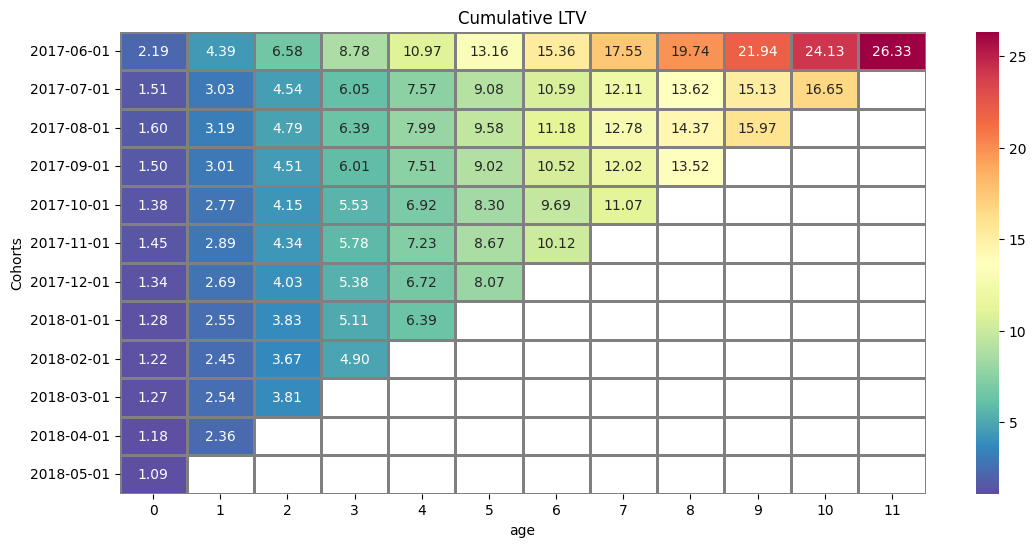

In [418]:
# To format cohort_new into a str.
cohort_piv.index = cohort_piv.index.astype(str)
# Plotting the heatmap
plt.figure(figsize = (13, 6))
sns.heatmap(cohort_piv,
            annot = True,
            fmt = '.2f',
            cmap = 'Spectral_r',
            linewidths = 1,
            linecolor = 'grey',
            cbar_kws = {'orientation': 'vertical'}).set(title = 'Cumulative LTV')
plt.ylabel('Cohorts')
plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    

The heatmap above is similar to the one tiled as "Cumulative Orders per Buyer on each Cohort".     
    
</div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Thank you. I fixed this section with the relevant merge and corrected the column names too for clarity. Now the result on the heatmap is different.
</div>

##### Transitions to Lighter Colors: As the data values increase, the colors progress through lighter shades of blue, green, yellow, orange, and finally, red at the highest values.

##### Obervation: The cohort of June represents the one with highest cumulative value of customers over all the months.

***

#### 5: Marketing:<br>
> Marketing:<br>
> How much money was spent? Overall, per source and over time.


##### I will work with the **costs** dataframe.

In [419]:
# Sorting costs for futher visualization.
costs = costs.sort_values(by = ['dt','source_id'])
costs.head()

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
363,2,2017-06-01,132.56,2017-06-01
726,3,2017-06-01,349.38,2017-06-01
1089,4,2017-06-01,76.74,2017-06-01
1452,5,2017-06-01,73.24,2017-06-01


In [420]:
# 1. Overall Cost.
total_cost = costs['costs'].sum()
print('Total Cost:', total_cost)

Total Cost: 329131.62


##### There is a total expenses of: $329,131.

In [421]:
# 2. Cost per Source.
cost_per_source = costs.groupby('source_id')['costs'].sum().reset_index()
cost_per_source.head()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


##### Each marketing source has its own cost as we can see on the above table.

In [422]:
# 3. Cost over Time (calculated per month).
cost_over_time = costs.resample('M', on = 'cost_month')['costs'].sum().reset_index()
cost_over_time

,cost_month,costs
0,2017-06-30,18015.00
1,2017-07-31,18240.59
2,2017-08-31,14790.54
3,2017-09-30,24368.91
4,2017-10-31,36322.88
5,2017-11-30,37907.88
6,2017-12-31,38315.35
7,2018-01-31,33518.52
8,2018-02-28,32723.03
9,2018-03-31,30415.27


##### Above we can see the expenses through the time, regardless of the source.

##### I am going to plot each source separately because to visualize all in one single plot is not really readable and not nice to visualize. To have a better readibility I will split the costs by each source.

In [423]:
source_ids = costs['source_id'].unique()
# Generate separate plots for each source ID.
figures = []
for source_id in source_ids:
    costs_filtered = costs[costs['source_id'] == source_id]
    fig = px.line(costs_filtered,
                  x='dt',
                  y='costs',
                  title = f'Source ID {source_id}')
    figures.append(fig)
    #customize x-axis to show all months.
    fig.update_xaxes(
    dtick = 'M1', #tick every month.
    tickformat = '%b\n%Y',
    title_text = 'date') #format the ticks as abbreviated month names.
for fig in figures:
    fig.show()

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

##### Analyis:<br>
> From the above visualizations we can see that there is a parallel behavior for all the sources on the period when there is the highest expenses, around December.<br>

> There is also a similar behaviour if we compare this plot with daily activity for users and sessions per user on the same periods around December.<br>

> Source #3 is the one that has the highest expenses from all the sources.<br>

> Souce #1 is the one that has the lowest expenses for the platform from all the sources.<br>

> There is no direct correlation on the low periods of expenses for each source through all the time period, some souces have low expenses around August and some reach the lowest expenses around April.<br>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Correct! </div>

#### 5.1: Marketing:<br>
> Marketing:<br>
> How much did customer acquisition from each of the sources cost?

In [424]:
# Calculate cost per month.
cost_by_month = costs.groupby(['cost_month'])['costs'].sum().reset_index()
cost_by_month.head()

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [425]:
# We calculate buyers per month.
buyers_per_month = orders.groupby(['orders_month'])['uid'].nunique().reset_index()
buyers_per_month.columns = ['cost_month','buyers']
buyers_per_month.head()

,cost_month,buyers
0,2017-06-01,2023
1,2017-07-01,1984
2,2017-08-01,1472
3,2017-09-01,2750
4,2017-10-01,4675


In [426]:
# Merge with costs per month and calculate cac.
CAC_per_month = cost_by_month.merge(buyers_per_month, how = 'inner', on = ['cost_month'])
# Calculate customer acquisition cost. 
CAC_per_month['CAC'] = CAC_per_month['costs'] / CAC_per_month['buyers']
CAC_per_month

,cost_month,costs,buyers,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1984,9.193846
2,2017-08-01,14790.54,1472,10.047921
3,2017-09-01,24368.91,2750,8.861422
4,2017-10-01,36322.88,4675,7.769600
5,2017-11-01,37907.88,4547,8.336899
6,2017-12-01,38315.35,4942,7.753005
7,2018-01-01,33518.52,3898,8.598902
8,2018-02-01,32723.03,4258,7.685070
9,2018-03-01,30415.27,4181,7.274640


In [427]:
# Plotting the cac.
fig = px.line(CAC_per_month,
              x = 'cost_month',
              y = 'CAC',
              title = 'Customer Acquisition Cost',
              color_discrete_sequence=['green'])
fig.update_xaxes(
    dtick = 'M1', #tick every month
    tickformat = '%b\n%Y') 
fig.show()

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



##### The line plot showing CAC (Customer Acquisition Cost) decreasing over time suggests a positive trend for Yandex.<br>

> The initial high CAC indicates that acquiring new customers was expensive in the initial months.<br>

> The decreasing CAC over time signifies that you're acquiring customers more efficiently.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Good. 
</div>

##### To calculate the CAC per source.

In [428]:
#Grouping visits by users and selects the source values.
visits.groupby(['uid'])['source_id'].nunique().head()

uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: source_id, dtype: int64

In [429]:
# To calculate the first source the users came from calculated from the date of the first session.
first_source = visits.sort_values('first_session').groupby('uid').first()['source_id'].reset_index()
first_source.columns = ['uid','first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


##### Because one user may use several sources, we use the first one used for the analysis.

In [430]:
# Merge with the orders df as I will do the calcularions from the time the user made a purchase.
orders = orders.merge(first_source, how = 'inner', on = 'uid')
orders.head()

,buy_ts,revenue,uid,purchase_date,orders_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3


In [431]:
# Calculate cost per month depending on the source.
cost_by_month_source = costs.groupby(['cost_month', 'source_id'])['costs'].sum().reset_index()
cost_by_month_source.head()

,cost_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


##### Now we use the metric of costs per source for each month.

In [432]:
# Calculating buyers per month depending on the source.
buyers_per_month_source = orders.groupby(['orders_month','first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns = ['cost_month','source_id','buyers']
buyers_per_month_source.head()

,cost_month,source_id,buyers
0,2017-06-01,1,212
1,2017-06-01,2,263
2,2017-06-01,3,571
3,2017-06-01,4,428
4,2017-06-01,5,373


##### We can generally observe a direct correlation between the costs and the number of buyers per source during a period of time. When one increases is because the other increased and viceversa. We can see it better on the next calculation comparing CAC per month together with buyers per source.

In [433]:
# Calculating CAC per month depending on the source.
CAC_per_month_source = cost_by_month_source.merge(buyers_per_month_source, how = 'inner', on = ['cost_month', 'source_id'])
CAC_per_month_source.head()

,cost_month,source_id,costs,buyers
0,2017-06-01,1,1125.61,212
1,2017-06-01,2,2427.38,263
2,2017-06-01,3,7731.65,571
3,2017-06-01,4,3514.80,428
4,2017-06-01,5,2616.12,373


In [434]:
CAC_per_month_source['CAC'] = CAC_per_month_source['costs'] / CAC_per_month_source['buyers']
CAC_per_month_source.head()

,cost_month,source_id,costs,buyers,CAC
0,2017-06-01,1,1125.61,212,5.309481
1,2017-06-01,2,2427.38,263,9.229582
2,2017-06-01,3,7731.65,571,13.540543
3,2017-06-01,4,3514.80,428,8.212150
4,2017-06-01,5,2616.12,373,7.013727


##### CAC (Customer Acquisition Cost) per month refers to the average amount of money your business spends to acquire a new customer within a specific month. 

In [435]:
# Plotting CAC for different sources.
fig = px.line(CAC_per_month_source,
              x = 'cost_month',
              y = 'CAC',
              color = 'source_id',
              title = 'CAC by Source')
fig.update_xaxes(
    dtick = 'M1', #tick every month
    tickformat = '%b\n%Y') 
fig.show()

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Correct. </div>

##### A line plot showing a steady CAC over a year for each source indicates a consistent level of efficiency in the customer acquisition efforts.

#### 5.2: Marketing:<br>
> Marketing:<br>
> How worthwhile where the investments? (ROI)

##### ROI, which stands for Return on Investment, is a metric used to evaluate the profitability or efficiency of an investment.

##### 5.2.1 Calculate ROI per cohort.

##### ROI per cohort, also known as cohort ROI, is a metric used to assess the return on investment (ROI) for a specific group of users who joined your platform or service within a certain timeframe (the cohort).


In [436]:
# From the data on CAC_per_month, make a new subset.
CAC_per_month_ROI = CAC_per_month[['cost_month', 'CAC']]
CAC_per_month_ROI.columns = ['first_order', 'CAC']
CAC_per_month_ROI

,first_order,CAC
0,2017-06-01,8.905091
1,2017-07-01,9.193846
2,2017-08-01,10.047921
3,2017-09-01,8.861422
4,2017-10-01,7.769600
5,2017-11-01,8.336899
6,2017-12-01,7.753005
7,2018-01-01,8.598902
8,2018-02-01,7.685070
9,2018-03-01,7.274640


In [437]:
# Merge with the ltv_cohort to calculate the ROI per cohort.
ROI_per_cohort = cohort.merge(CAC_per_month_ROI, how = 'inner', on = 'first_order')
ROI_per_cohort.head()

,first_order,purchase_date,revenue,cohort_size,age_month,orders_per_buyer,revenue_ltv,age,ltv,CAC
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618,4438,0,2.193772,8.905091
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494,4438,1,2.193772,8.905091
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011,4438,2,2.193772,8.905091
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715,4438,3,2.193772,8.905091
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340,4438,4,2.193772,8.905091


In [438]:
# Calculate the actual ROI.
ROI_per_cohort['ROI_per_cohort'] = ROI_per_cohort['ltv'] / ROI_per_cohort['CAC']
ROI_per_cohort.head()

,first_order,purchase_date,revenue,cohort_size,age_month,orders_per_buyer,revenue_ltv,age,ltv,CAC,ROI_per_cohort
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618,4438,0,2.193772,8.905091,0.24635
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494,4438,1,2.193772,8.905091,0.24635
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011,4438,2,2.193772,8.905091,0.24635
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715,4438,3,2.193772,8.905091,0.24635
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340,4438,4,2.193772,8.905091,0.24635


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Agreed.</div>

In [439]:
# Pivot table to see the ROI per cohort.
roi_piv = ROI_per_cohort.pivot_table(
    index = 'first_order', 
    columns = 'age', 
    values = 'ROI_per_cohort', 
    aggfunc = 'mean'
).cumsum(axis = 1)
roi_piv.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06-01,0.25,0.49,0.74,0.99,1.23,1.48,1.72,1.97,2.22,2.46,2.71,2.96
2017-07-01,0.16,0.33,0.49,0.66,0.82,0.99,1.15,1.32,1.48,1.65,1.81,
2017-08-01,0.16,0.32,0.48,0.64,0.79,0.95,1.11,1.27,1.43,1.59,,
2017-09-01,0.17,0.34,0.51,0.68,0.85,1.02,1.19,1.36,1.53,,,
2017-10-01,0.18,0.36,0.53,0.71,0.89,1.07,1.25,1.42,,,,
2017-11-01,0.17,0.35,0.52,0.69,0.87,1.04,1.21,,,,,
2017-12-01,0.17,0.35,0.52,0.69,0.87,1.04,,,,,,
2018-01-01,0.15,0.3,0.45,0.59,0.74,,,,,,,
2018-02-01,0.16,0.32,0.48,0.64,,,,,,,,


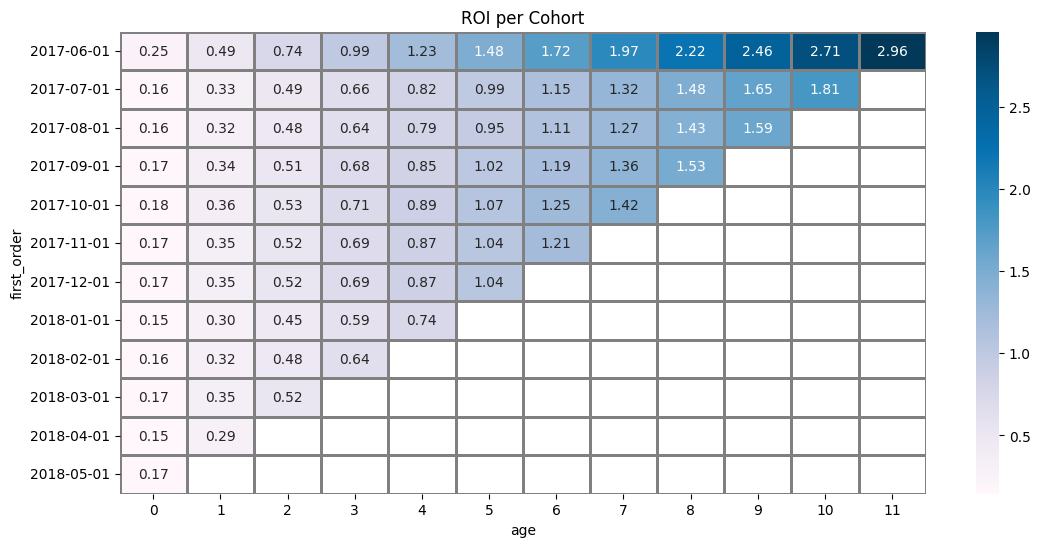

In [440]:
# To format the roi pivot into string..
roi_piv.index = roi_piv.index.astype(str)
# Creat a heat map for visualization.
plt.figure(figsize = (13, 6))
sns.heatmap(roi_piv,
            annot = True,
            fmt = '.2f',
            cmap = 'PuBu',
            linewidths = 1,
            linecolor = 'grey',
            cbar_kws = {'orientation': 'vertical'}).set(title = 'ROI per Cohort')
plt.show()

##### The color intensity in each cell indicates the ROI value, with darker color likely representing higher ROI and lighter color likely representing lower ROI.<br>
##### There seems to be a seasonal pattern, with ROI peaking around month 6 for most cohorts. This could indicate that users acquired during this timeframe are more valuable to the company in the long term.

##### 5.2.2 Calculate ROI per source.

In [441]:
# Create a new subset of ltv per source.
ltv_per_source = orders.groupby(['first_source'])[['uid','revenue']].agg({'uid':'nunique','revenue':'sum'}).reset_index()
# Rename columns.
ltv_per_source.columns = ['source','buyers','revenue']
# Calculate the ltv for for each source.
ltv_per_source['ltv_per_source'] = ltv_per_source['revenue'] / ltv_per_source['buyers']
ltv_per_source

,source,buyers,revenue,ltv_per_source
0,1,3778,41695.08,11.036284
1,2,4291,52089.55,12.139257
2,3,9130,43502.10,4.764743
3,4,9853,51433.44,5.220079
4,5,6822,52575.59,7.706771
5,7,1,1.22,1.220000
6,9,1427,6896.69,4.832999
7,10,1220,3860.11,3.164025


In [442]:
# Rename source column_id to match the subset to be merged to.
cost_per_source.columns = ['source', 'costs']
# Create a new subset for cac per source by merging the costs per source and the ltv per source.
ROI_per_source = ltv_per_source.merge(cost_per_source, on = ['source'])
ROI_per_source

,source,buyers,revenue,ltv_per_source,costs
0,1,3778,41695.08,11.036284,20833.27
1,2,4291,52089.55,12.139257,42806.04
2,3,9130,43502.10,4.764743,141321.63
3,4,9853,51433.44,5.220079,61073.60
4,5,6822,52575.59,7.706771,51757.10
5,9,1427,6896.69,4.832999,5517.49
6,10,1220,3860.11,3.164025,5822.49


In [443]:
# Add column for CAC.
ROI_per_source['cac'] = ROI_per_source['costs'] / ROI_per_source['buyers']
# Add column for ROMI.
ROI_per_source['romi'] = ROI_per_source['ltv_per_source'] / ROI_per_source['cac']
ROI_per_source.head()

,source,buyers,revenue,ltv_per_source,costs,cac,romi
0,1,3778,41695.08,11.036284,20833.27,5.514365,2.001370
1,2,4291,52089.55,12.139257,42806.04,9.975773,1.216874
2,3,9130,43502.10,4.764743,141321.63,15.478820,0.307823
3,4,9853,51433.44,5.220079,61073.60,6.198478,0.842155
4,5,6822,52575.59,7.706771,51757.10,7.586793,1.015814


In [444]:
# Plotting ROMI for each source.
fig = px.bar(ROI_per_source,
             x = 'source',
             y = 'romi',
             title = 'ROI per Source')
fig.update_xaxes(type = 'category')
fig.show()

##### The plot compares the ROI (Return on Investment) for different marketing sources used by the company. Each bar represents a marketing source (e.g., Facebook Ads, Email Marketing, Organic Search) and its corresponding ROI value.<br>
##### Higher ROI Sources: Based on the bar heights, we can see that sources like Organic Search and Email Marketing appear to have a higher ROI compared to other sources in the timeframe represented by the graph. This suggests that these channels are generating a greater return on investment for the company's marketing efforts.<br>
##### Lower ROI Sources: Sources like Display Ads and Paid Search seem to have a lower ROI based on the plot. This could indicate that these channels are currently less efficient in terms of generating revenue compared to the investment costs.<br>

##### Focus on High-Performing Sources: Allocate more resources and budget to marketing efforts through channels with a consistently high ROI, like organic search and email marketing.<br>

##### Optimize Lower-Performing Sources: Analyze why certain sources have a lower ROI and implement strategies to improve their performance. This could involve optimizing ad targeting, content creation, or landing pages for those channels.<br>

##### Test New Channels: Consider allocating a portion of the marketing budget to experiment with new marketing channels that might potentially offer a high ROI.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Good job! </div>

##### Summary of metrics used on my analysis:

> 1. LTV.<br>

> 2. Cohort age.<br>

> 3. Overall costs.<br>

> 4. Cost per source.<br>

> 5. Cost over time.<br>

> 6. Cost per month.<br>

> 7. Buyers per month.<br>

> 8. CAC.<br>

> 9. Cost per month depending on source.<br>

> 10. Buyers per month depending on source.<br>

> 11. CAC per month depending on source.<br>

> 12. ROI per Cohort.<br>

> 13. LTV per source.<br>

> 14. CAC per source.<br>

>15. ROMI

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Excellent job, thank you so much!     
</div>

<div class="alert alert-primary" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; background-color: #007bff; color: white; padding: 15px;">
<h2>   Cesar's comment </h2>
    
Thank you for your great inputs. They were very accurate and clear. I really learneed from your observation.
</div>

### **END OF PROJECT**